# Python Libraries

In [116]:
import pandas as pd
import numpy as np

# Load the DataSet

In [117]:
dataset=pd.read_csv('reviews.csv')
dataset.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-fgH355YH_t7J2q4xYo6ZzN3Mc7iSrrTV6ke8hG_fl4Q,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14GiGET2XHTvsSEsA07ZBPu2s1E6fOXd9WyT_ahChpw,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3fAX6VG0NAZCudCQpQRRI3GLL_tr8DQzUTP1hrOYG74A,john alpha,https://play-lh.googleusercontent.com/a-/AOh14GjpfgjOEbD3brypMeMT3KvhYlWG_nO2bMnMIfY9,I have been begging for a refund from this app for over a month and nobody is replying me,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, your email has been answered, and there was no subscription registered under this address. Please check which email address you are using under you app settings- profile, and let us know so we can look further into this.",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azuuTvqA9KWdTQqNNXWZsJEhmSuYUY_LmL-OdUIl4j70wg,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14GidHUHTvHZTXBX36CdxFeccVR2IasC1MHUHXLuFpg,Very costly for the premium version (approx Indian Rupees 910 per year). Better to download the premium version of this app from apkmos website and use it. Microsoft to do list app is far more better.,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z7hfGM7Gan22TJrN89NmGVEdj5o4U6W4I6slbTx8OsQw,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WFniac/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucn_nhfTJ2FT63nZ53feI1vVx58DJg/photo.jpg,"Used to keep me organized, but all the 2020 UPDATES have made a mess of things !!! Y cudn't u leave well enuf alone ??? Guess ur techies feel the need to keep making changes to justify continuing to collect their salary !!! 🤤🤤🤤",1,0,NaN,2020-10-26 13:28:07,"What do you find troublesome about the update? We'd love to get your feedback, by writing to us at https://www.any.do/contact_form. We're constantly trying to provide the best possible app for our users, and feedback like yours help us do so.",2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZEQ0Q2rDzcc9WMABIXZNu0pIJOhiFrA4uhMOLq1ZIWKQA,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-qfB4/AAAAAAAAAAI/AAAAAAAAAAA/AMZuuclb31oz9DIIm_ibRaVH8B2uF2SVZw/photo.jpg,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [118]:
dataset=dataset[['content','score']]
dataset.head()

,content,score
0,I cannot open the app anymore,1
1,I have been begging for a refund from this app for over a month and nobody is replying me,1
2,Very costly for the premium version (approx Indian Rupees 910 per year). Better to download the premium version of this app from apkmos website and use it. Microsoft to do list app is far more better.,1
3,"Used to keep me organized, but all the 2020 UPDATES have made a mess of things !!! Y cudn't u leave well enuf alone ??? Guess ur techies feel the need to keep making changes to justify continuing to collect their salary !!! 🤤🤤🤤",1
4,Dan Birthday Oct 28,1


# Gain Insight from the data

In [119]:
dataset.shape

(12495, 2)

In [120]:
dataset.score.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [121]:
dataset.describe()

,score
count,12495.000000
mean,3.094198
std,1.457693
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  12495 non-null  object
 1   score    12495 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 195.4+ KB


In [123]:
dataset.sample()

,content,score
2368,No transparent theme,3


In [124]:
dataset.dtypes

content    object
score       int64
dtype: object

# Visualize the data

In [125]:
import seaborn as sns


<AxesSubplot:ylabel='score'>

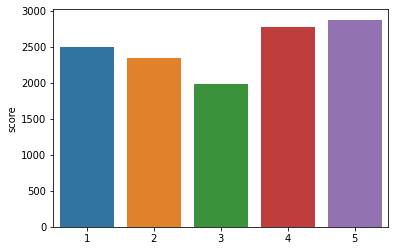

In [126]:
sns.barplot(x=dataset.score.value_counts().index,y=dataset.score.value_counts())

# Clean the data

In [127]:
dataset.isna().sum()

content    0
score      0
dtype: int64

In [128]:
def encoding(x):
  if x<=2:
    x=0
  elif x==3:
    x=1
  else:
    x=2
  return x 

dataset.score=dataset.score.apply(encoding)
dataset


,content,score
0,I cannot open the app anymore,0
1,I have been begging for a refund from this app for over a month and nobody is replying me,0
2,Very costly for the premium version (approx Indian Rupees 910 per year). Better to download the premium version of this app from apkmos website and use it. Microsoft to do list app is far more better.,0
3,"Used to keep me organized, but all the 2020 UPDATES have made a mess of things !!! Y cudn't u leave well enuf alone ??? Guess ur techies feel the need to keep making changes to justify continuing to collect their salary !!! 🤤🤤🤤",0
4,Dan Birthday Oct 28,0
5,It has changed how I viewed my different lists. Now they are all jumbled together and I can't find what I need.,0
6,"I'm only looking for a grocery list app but every time I tap away from the app I have to tap again (after opening it again) to see the list. I can't find a way to keep a certain list showing when I open or reopen the app. eta: in response to the reply, it doesn't work like that on my phone. Even if the grocery list is showing, when I open another app and then go back to the any.do app, the list of lists is showing and I have to retap to get the grocery list to show again.",0
7,"Reset my free trial, new phone I'd like to see if it's better.",0
8,How do to stop monthly payment because i don't use this app anymore,0
9,"I complain about not crashes and it was immediately fixed!Good job!! Now the crashes have returned! I really need it fixed because I need to change apps otherwise 😩 I followed your instructions on deleting the data, etc but it just now crashed again. I am a patient person and I have used Any Do for years but let's try one more time and then I will have to find another app. It crashed again 😑",0


# Visualize the data

<AxesSubplot:ylabel='score'>

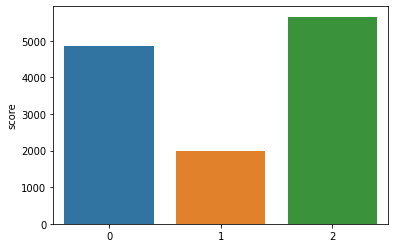

In [129]:
sns.barplot(x=dataset.score.value_counts().index,y=dataset.score.value_counts())

# Clean the Text

In [130]:
import re

In [131]:
def modify(x):
    x=x.lower()
    x= re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', x)
    x=re.sub(r'[\w\.-]+@[\w\.-]+',' ',x)
    x=re.sub(r'[^\w\s\']', ' ', x)
    x=re.sub(" \d+", " ", x)
    x=re.sub(r' +',' ',x)
    return x

In [132]:
dataset.content=dataset.content.apply(modify)


In [133]:
dataset.iloc[2942]

content    can't even log in seems to stop working or fre...
score                                                      0
Name: 2942, dtype: object

In [134]:
dataset

,content,score
0,i cannot open the app anymore,0
1,i have been begging for a refund from this app for over a month and nobody is replying me,0
2,very costly for the premium version approx indian rupees per year better to download the premium version of this app from apkmos website and use it microsoft to do list app is far more better,0
3,used to keep me organized but all the updates have made a mess of things y cudn't u leave well enuf alone guess ur techies feel the need to keep making changes to justify continuing to collect their salary,0
4,dan birthday oct,0
5,it has changed how i viewed my different lists now they are all jumbled together and i can't find what i need,0
6,i'm only looking for a grocery list app but every time i tap away from the app i have to tap again after opening it again to see the list i can't find a way to keep a certain list showing when i open or reopen the app eta in response to the reply it doesn't work like that on my phone even if the grocery list is showing when i open another app and then go back to the any do app the list of lists is showing and i have to retap to get the grocery list to show again,0
7,reset my free trial new phone i'd like to see if it's better,0
8,how do to stop monthly payment because i don't use this app anymore,0
9,i complain about not crashes and it was immediately fixed good job now the crashes have returned i really need it fixed because i need to change apps otherwise i followed your instructions on deleting the data etc but it just now crashed again i am a patient person and i have used any do for years but let's try one more time and then i will have to find another app it crashed again,0


# Preprocess the text

## Tokenization

In [135]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Arnish
[nltk_data]     Satasiya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [136]:
dataset.content=dataset.content.apply(lambda x:x.split())
dataset

,content,score
0,"[i, cannot, open, the, app, anymore]",0
1,"[i, have, been, begging, for, a, refund, from, this, app, for, over, a, month, and, nobody, is, replying, me]",0
2,"[very, costly, for, the, premium, version, approx, indian, rupees, per, year, better, to, download, the, premium, version, of, this, app, from, apkmos, website, and, use, it, microsoft, to, do, list, app, is, far, more, better]",0
3,"[used, to, keep, me, organized, but, all, the, updates, have, made, a, mess, of, things, y, cudn't, u, leave, well, enuf, alone, guess, ur, techies, feel, the, need, to, keep, making, changes, to, justify, continuing, to, collect, their, salary]",0
4,"[dan, birthday, oct]",0
5,"[it, has, changed, how, i, viewed, my, different, lists, now, they, are, all, jumbled, together, and, i, can't, find, what, i, need]",0
6,"[i'm, only, looking, for, a, grocery, list, app, but, every, time, i, tap, away, from, the, app, i, have, to, tap, again, after, opening, it, again, to, see, the, list, i, can't, find, a, way, to, keep, a, certain, list, showing, when, i, open, or, reopen, the, app, eta, in, response, to, the, reply, it, doesn't, work, like, that, on, my, phone, even, if, the, grocery, list, is, showing, when, i, open, another, app, and, then, go, back, to, the, any, do, app, the, list, of, lists, is, showing, and, i, have, to, retap, to, get, the, grocery, list, to, ...]",0
7,"[reset, my, free, trial, new, phone, i'd, like, to, see, if, it's, better]",0
8,"[how, do, to, stop, monthly, payment, because, i, don't, use, this, app, anymore]",0
9,"[i, complain, about, not, crashes, and, it, was, immediately, fixed, good, job, now, the, crashes, have, returned, i, really, need, it, fixed, because, i, need, to, change, apps, otherwise, i, followed, your, instructions, on, deleting, the, data, etc, but, it, just, now, crashed, again, i, am, a, patient, person, and, i, have, used, any, do, for, years, but, let's, try, one, more, time, and, then, i, will, have, to, find, another, app, it, crashed, again]",0


## remove stopwords

In [137]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Arnish
[nltk_data]     Satasiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [138]:
list_stopwords=stopwords.words("english")
list_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

There are some word, we don't want to remove from text

In [139]:
not_remove=["no","not", 'don',
 "don't",'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]
  


In [140]:
list_stopwords=[word for word in list_stopwords if word not in not_remove]
list_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [141]:
def remove_stop_words(x):
  x=[word for word in x if word not in list_stopwords]
  return x

In [142]:
dataset.content=dataset.content.apply(remove_stop_words)
dataset

,content,score
0,"[cannot, open, app, anymore]",0
1,"[begging, refund, app, month, nobody, replying]",0
2,"[costly, premium, version, approx, indian, rupees, per, year, better, download, premium, version, app, apkmos, website, use, microsoft, list, app, far, better]",0
3,"[used, keep, organized, updates, made, mess, things, cudn't, u, leave, well, enuf, alone, guess, ur, techies, feel, need, keep, making, changes, justify, continuing, collect, salary]",0
4,"[dan, birthday, oct]",0
5,"[changed, viewed, different, lists, jumbled, together, can't, find, need]",0
6,"[i'm, looking, grocery, list, app, every, time, tap, away, app, tap, opening, see, list, can't, find, way, keep, certain, list, showing, open, reopen, app, eta, response, reply, doesn't, work, like, phone, even, grocery, list, showing, open, another, app, go, back, app, list, lists, showing, retap, get, grocery, list, show]",0
7,"[reset, free, trial, new, phone, i'd, like, see, better]",0
8,"[stop, monthly, payment, don't, use, app, anymore]",0
9,"[complain, not, crashes, immediately, fixed, good, job, crashes, returned, really, need, fixed, need, change, apps, otherwise, followed, instructions, deleting, data, etc, crashed, patient, person, used, years, let's, try, one, time, find, another, app, crashed]",0


**REMOVE RECORDS THAT HAS 0 WORD**

In [143]:
dataset = dataset[dataset.content.map(lambda x: len(x)) > 0]
dataset

,content,score
0,"[cannot, open, app, anymore]",0
1,"[begging, refund, app, month, nobody, replying]",0
2,"[costly, premium, version, approx, indian, rupees, per, year, better, download, premium, version, app, apkmos, website, use, microsoft, list, app, far, better]",0
3,"[used, keep, organized, updates, made, mess, things, cudn't, u, leave, well, enuf, alone, guess, ur, techies, feel, need, keep, making, changes, justify, continuing, collect, salary]",0
4,"[dan, birthday, oct]",0
5,"[changed, viewed, different, lists, jumbled, together, can't, find, need]",0
6,"[i'm, looking, grocery, list, app, every, time, tap, away, app, tap, opening, see, list, can't, find, way, keep, certain, list, showing, open, reopen, app, eta, response, reply, doesn't, work, like, phone, even, grocery, list, showing, open, another, app, go, back, app, list, lists, showing, retap, get, grocery, list, show]",0
7,"[reset, free, trial, new, phone, i'd, like, see, better]",0
8,"[stop, monthly, payment, don't, use, app, anymore]",0
9,"[complain, not, crashes, immediately, fixed, good, job, crashes, returned, really, need, fixed, need, change, apps, otherwise, followed, instructions, deleting, data, etc, crashed, patient, person, used, years, let's, try, one, time, find, another, app, crashed]",0


## Lemmatization

In [144]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')


[nltk_data] Downloading package wordnet to C:\Users\Arnish
[nltk_data]     Satasiya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [145]:
def wordnetlemmatizer(x):
  x=[WordNetLemmatizer().lemmatize(word) for word in x]
  return x


In [146]:
dataset.content=dataset.content.apply(wordnetlemmatizer)
dataset

C:\Users\Arnish Satasiya\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,content,score
0,"[cannot, open, app, anymore]",0
1,"[begging, refund, app, month, nobody, replying]",0
2,"[costly, premium, version, approx, indian, rupee, per, year, better, download, premium, version, app, apkmos, website, use, microsoft, list, app, far, better]",0
3,"[used, keep, organized, update, made, mess, thing, cudn't, u, leave, well, enuf, alone, guess, ur, techie, feel, need, keep, making, change, justify, continuing, collect, salary]",0
4,"[dan, birthday, oct]",0
5,"[changed, viewed, different, list, jumbled, together, can't, find, need]",0
6,"[i'm, looking, grocery, list, app, every, time, tap, away, app, tap, opening, see, list, can't, find, way, keep, certain, list, showing, open, reopen, app, eta, response, reply, doesn't, work, like, phone, even, grocery, list, showing, open, another, app, go, back, app, list, list, showing, retap, get, grocery, list, show]",0
7,"[reset, free, trial, new, phone, i'd, like, see, better]",0
8,"[stop, monthly, payment, don't, use, app, anymore]",0
9,"[complain, not, crash, immediately, fixed, good, job, crash, returned, really, need, fixed, need, change, apps, otherwise, followed, instruction, deleting, data, etc, crashed, patient, person, used, year, let's, try, one, time, find, another, app, crashed]",0


# Train - Test Split

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.content, dataset.score, test_size=0.20, random_state=42)

#  Feature engineering

**TF-IDF**

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [149]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train.astype(str))

In [150]:
tfidf_vocab = tfidf.get_feature_names()
tfidf_vocab,len(tfidf_vocab)

(['10',
  '12',
  '17',
  '2012',
  '2018',
  '2019',
  '2020',
  '24',
  '28',
  '29',
  '29e',
  '2nd',
  '32780',
  '38',
  '420',
  '4k',
  '84',
  '8pm',
  '99',
  '___',
  '______',
  '_task',
  '_u',
  '_каждый_',
  'a1',
  'a10',
  'a2020a',
  'a4',
  'a5',
  'a51',
  'a8',
  'aa',
  'aaa',
  'aaah',
  'aak',
  'aap',
  'aapako',
  'aarach',
  'aati',
  'abandon',
  'abandoned',
  'abc',
  'abc123',
  'abd',
  'abdon',
  'abhor',
  'abhorrent',
  'ability',
  'abitos',
  'able',
  'abou',
  'abound',
  'abour',
  'abraços',
  'abre',
  'abrir',
  'abruptly',
  'absence',
  'absolument',
  'absolute',
  'absolutely',
  'abstract',
  'absurd',
  'absurdly',
  'abt',
  'abuse',
  'abusive',
  'ac',
  'acal',
  'acalendar',
  'acalender',
  'acaltasks',
  'acara2',
  'acc',
  'accelerated',
  'accept',
  'acceptable',
  'accepted',
  'accepts',
  'acces',
  'accesible',
  'access',
  'accessed',
  'accessibility',
  'accessible',
  'accessing',
  'accessory',
  'accident',
  'accid

In [151]:
print(X_train.shape)

(9964, 9904)


In [152]:
print(X_train[1])

  (0, 2721)	0.3328852858479927
  (0, 6955)	0.30974872668570474
  (0, 6060)	0.36430154513324503
  (0, 8906)	0.23250662709591555
  (0, 2434)	0.3118716972073416
  (0, 5427)	0.18347398981603574
  (0, 7907)	0.15453760262446087
  (0, 8298)	0.3918836866316048
  (0, 4507)	0.16420681581127636
  (0, 2432)	0.32776346307557314
  (0, 4669)	0.2735585885301915
  (0, 8018)	0.20494229114063608
  (0, 5199)	0.2164680121376479


# Choosing the model

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [154]:
X_train.shape, y_train.shape

((9964, 9904), (9964,))

In [155]:
X_test=tfidf.transform(X_test.astype(str))
X_test.shape

(2492, 9904)

## Logistic Regression

In [156]:
model=LogisticRegression(random_state=42,max_iter=1000).fit(X_train,y_train)


In [157]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 2, ..., 2, 2, 0], dtype=int64)

In [158]:
L_train_accuracy=model.score(X_train,y_train)
L_test_accuracy=model.score(X_test,y_test)

In [159]:
print("Train accuracy is: ",L_train_accuracy)
print("Test accuracy is: ",L_test_accuracy)

Train accuracy is:  0.8114211160176635
Test accuracy is:  0.721107544141252


## Naive Bayes

In [160]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [161]:
from sklearn.naive_bayes import MultinomialNB

In [162]:
mnb=MultinomialNB()
mnb.fit(X_train.toarray(),y_train)


MultinomialNB()

In [163]:
N_train_accuracy=mnb.score(X_train,y_train)
N_test_accuracy=mnb.score(X_test,y_test)

In [164]:
print("Train accuracy is: ",N_train_accuracy)
print("Test accuracy is: ",N_test_accuracy)

Train accuracy is:  0.7691690084303493
Test accuracy is:  0.7207062600321027


## Comparision of both model

In [165]:
model=["LogisticRegression","MultinomialNB"]
col=["Train accuracy","Test accuracy"]

comparision=pd.DataFrame({"Train accuracy":[L_train_accuracy*100,N_train_accuracy*100],"Test accuracy":[L_test_accuracy*100,N_test_accuracy*100]},index=model)

In [166]:
comparision

,Train accuracy,Test accuracy
LogisticRegression,81.142112,72.110754
MultinomialNB,76.916901,72.070626
